# Time Series Weather Forecasting

In [39]:
# Importing Time series libraries
import os # path
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf

import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


In [40]:
# managing figure size in the beginning of code
mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['axes.grid'] = False


## Import the weather dataset

In [41]:
# zip_path = tf.keras.utils.get_file(
#     origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname= 'jena_climate_2009_2016.csv.zip',
#     extract=True
# )

# csv_path, _ = os.path.splitext(zip_path)
# print(csv_path)

# df = pd.read_csv(csv_path)
# # Save the data to csv file
# df.to_csv("jena_climate_2009_2016.csv")
# df.head()

In [42]:
df = pd.read_csv("./jena_climate_2009_2016.csv")
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [43]:
df.shape

(420551, 15)

In [44]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [45]:
pd.set_option("display.max_rows",None)

In [46]:
df.head(50)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0   01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1   01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2   01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3   01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4   01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5   01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6   01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7   01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8   01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9   01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   
10  01.01.2009 01:50:00    996.62     -8.76    264.66        -9.66    93.1   
11  01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
12  01.01.2009 02:10:00    996.63     -8.85    264.57        -9.70    93.5   
13  01.01.2009 02:20:00    996.74     -8.83    264.58        -9.68    93.5   
14  01.01.2009 02:30:00    996.81     -8.66    264.74        -9.46    93.9   
15  01.01.2009 02:40:00    996.81     -8.66    264.74        -9.50    93.6   
16  01.01.2009 02:50:00    996.86     -8.70    264.70        -9.55    93.5   
17  01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66    93.5   
18  01.01.2009 03:10:00    996.87     -8.84    264.56        -9.69    93.5   
19  01.01.2009 03:20:00    996.97     -8.94    264.45        -9.82    93.3   
20  01.01.2009 03:30:00    997.08     -8.94    264.44        -9.80    93.4   
21  01.01.2009 03:40:00    997.10     -8.86    264.52        -9.76    93.1   
22  01.01.2009 03:50:00    997.06     -8.99    264.39        -9.99    92.4   
23  01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
24  01.01.2009 04:10:00    997.05     -9.23    264.15       -10.25    92.2   
25  01.01.2009 04:20:00    997.11     -9.49    263.89       -10.54    92.0   
26  01.01.2009 04:30:00    997.19     -9.50    263.87       -10.51    92.3   
27  01.01.2009 04:40:00    997.24     -9.35    264.02       -10.29    92.8   
28  01.01.2009 04:50:00    997.37     -9.47    263.89       -10.46    92.4   
29  01.01.2009 05:00:00    997.46     -9.63    263.72       -10.65    92.2   
30  01.01.2009 05:10:00    997.43     -9.67    263.68       -10.63    92.6   
31  01.01.2009 05:20:00    997.42     -9.68    263.67       -10.73    92.0   
32  01.01.2009 05:30:00    997.53     -9.90    263.45       -10.98    91.7   
33  01.01.2009 05:40:00    997.60     -9.91    263.43       -10.90    92.4   
34  01.01.2009 05:50:00    997.62     -9.51    263.83       -10.37    93.4   
35  01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
36  01.01.2009 06:10:00    997.81     -9.59    263.74       -10.47    93.2   
37  01.01.2009 06:20:00    997.86     -9.15    264.17       -10.02    93.3   
38  01.01.2009 06:30:00    998.00     -8.91    264.40        -9.89    92.5   
39  01.01.2009 06:40:00    998.14     -9.04    264.26       -10.11    91.9   
40  01.01.2009 06:50:00    998.21     -9.43    263.86       -10.57    91.3   
41  01.01.2009 07:00:00    998.33     -9.17    264.12       -10.10    92.9   
42  01.01.2009 07:10:00    998.50     -8.71    264.56        -9.63    93.0   
43  01.01.2009 07:20:00    998.59     -8.55    264.72        -9.47    93.0   
44  01.01.2009 07:30:00    998.79     -8.40    264.85        -9.31    93.1   
45  01.01.2009 07:40:00    998.86     -8.30    264.95        -9.21    93.1   
46  01.01.2009 07:50:00    999.04     -8.13    265.10        -9.03    93.2   
47  01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
48  01.01.2009 08:10:00    999.27     -8.14    265.08        -9.12    92.6   
49  01.01.2009 08:20:00    999.33     -8.06    265.15        -9.02    92.7   

    VPmax (mbar)  VPact (mbar)  VPd

In [47]:
df.tail(100)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
420451  31.12.2016 07:30:00   1006.34     -6.26    266.42        -9.32   
420452  31.12.2016 07:40:00   1006.26     -6.35    266.33        -8.62   
420453  31.12.2016 07:50:00   1006.29     -6.46    266.22        -8.80   
420454  31.12.2016 08:00:00   1006.28     -6.80    265.89        -8.85   
420455  31.12.2016 08:10:00   1006.22     -6.84    265.85        -8.71   
420456  31.12.2016 08:20:00   1006.20     -6.64    266.05        -8.52   
420457  31.12.2016 08:30:00   1006.21     -6.87    265.82        -8.78   
420458  31.12.2016 08:40:00   1006.22     -6.31    266.38        -8.40   
420459  31.12.2016 08:50:00   1006.24     -6.42    266.26        -8.71   
420460  31.12.2016 09:00:00   1006.23     -6.36    266.33        -8.51   
420461  31.12.2016 09:10:00   1006.23     -6.31    266.37        -8.42   
420462  31.12.2016 09:20:00   1006.20     -6.37    266.32        -8.49   
420463  31.12.2016 09:30:00   1006.14     -6.09    266.61        -8.38   
420464  31.12.2016 09:40:00   1006.07     -5.96    266.74        -8.36   
420465  31.12.2016 09:50:00   1006.06     -5.60    267.10        -8.13   
420466  31.12.2016 10:00:00   1006.04     -5.24    267.46        -8.09   
420467  31.12.2016 10:10:00   1005.99     -5.02    267.68        -7.71   
420468  31.12.2016 10:20:00   1005.96     -4.48    268.22        -7.53   
420469  31.12.2016 10:30:00   1005.86     -4.60    268.12        -7.37   
420470  31.12.2016 10:40:00   1005.78     -4.41    268.30        -7.07   
420471  31.12.2016 10:50:00   1005.64     -4.15    268.58        -7.03   
420472  31.12.2016 11:00:00   1005.53     -3.76    268.97        -6.82   
420473  31.12.2016 11:10:00   1005.38     -3.31    269.44        -6.62   
420474  31.12.2016 11:20:00   1005.28     -2.96    269.79        -6.30   
420475  31.12.2016 11:30:00   1005.15     -2.52    270.25        -6.24   
420476  31.12.2016 11:40:00   1005.00     -1.92    270.85        -6.15   
420477  31.12.2016 11:50:00   1004.84     -1.89    270.89        -6.35   
420478  31.12.2016 12:00:00   1004.76     -1.19    271.60        -5.90   
420479  31.12.2016 12:10:00   1004.62     -0.71    272.09        -5.97   
420480  31.12.2016 12:20:00   1004.45     -0.20    272.62        -5.50   
420481  31.12.2016 12:30:00   1004.25      0.58    273.41        -5.16   
420482  31.12.2016 12:40:00   1004.05      1.26    274.11        -4.70   
420483  31.12.2016 12:50:00   1003.95      1.57    274.42        -5.04   
420484  31.12.2016 13:00:00   1003.87      1.64    274.49        -4.62   
420485  31.12.2016 13:10:00   1003.79      1.97    274.83        -4.38   
420486  31.12.2016 13:20:00   1003.70      2.17    275.04        -4.18   
420487  31.12.2016 13:30:00   1003.59      2.55    275.43        -3.98   
420488  31.12.2016 13:40:00   1003.48      3.08    275.97        -3.70   
420489  31.12.2016 13:50:00   1003.27      3.92    276.82        -3.60   
420490  31.12.2016 14:00:00   1003.24      3.97    276.88        -3.64   
420491  31.12.2016 14:10:00   1003.25      4.15    277.05        -3.76   
420492  31.12.2016 14:20:00   1003.12      4.41    277.32        -3.68   
420493  31.12.2016 14:30:00   1003.05      4.78    277.70        -3.52   
420494  31.12.2016 14:40:00   1003.12      5.19    278.10        -3.20   
420495  31.12.2016 14:50:00   1003.12      5.21    278.12        -3.17   
420496  31.12.2016 15:00:00   1003.12      5.09    278.00        -3.09   
420497  31.12.2016 15:10:00   1003.09      4.97    277.88        -3.04   
420498  31.12.2016 15:20:00   1002.96      4.60    277.52        -3.46   
420499  31.12.2016 15:30:00   1002.88      4.42    277.36        -3.42   
420500  31.12.2016 15:40:00   1002.80      3.98    276.92        -3.43   
420501  31.12.2016 15:50:00   1002.74      3.56    276.51        -3.85   
420502  31.12.2016 16:00:00   1002.63      2.87    275.82        -4.24   
420503  31.12.2016 16:10:00   1002.54      2.44    275.40        -4.39   
420504  31.12.2016 16:

In [48]:
# Selecting every 12th row as sample data
# select the data based on the DateTime column for every 2 hours Interval
# Slice (start:stop:stop] starting from index 11 take ever 12th record.
df = df[11::12]
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11  01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23  01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35  01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47  01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59  01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11          3.12          2.90          0.21       1.81             2.91   
23          3.07          2.85          0.23       1.78             2.85   
35          2.93          2.71          0.21       1.69             2.72   
47          3.31          3.07          0.24       1.92             3.08   
59          3.60          3.30          0.30       2.05             3.29   

    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11       1312.25      0.25           0.63     190.3  
23       1313.61      0.10           0.38     240.0  
35       1317.71      0.05           0.50     146.0  
47       1311.65      0.72           1.25     213.9  
59       1307.76      1.45           3.00     292.6

In [49]:
df.shape

(35045, 15)

In [50]:
date_time = pd.to_datetime(df.pop('Date Time'),format='%d.%m.%Y %H:%M:%S')

In [51]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

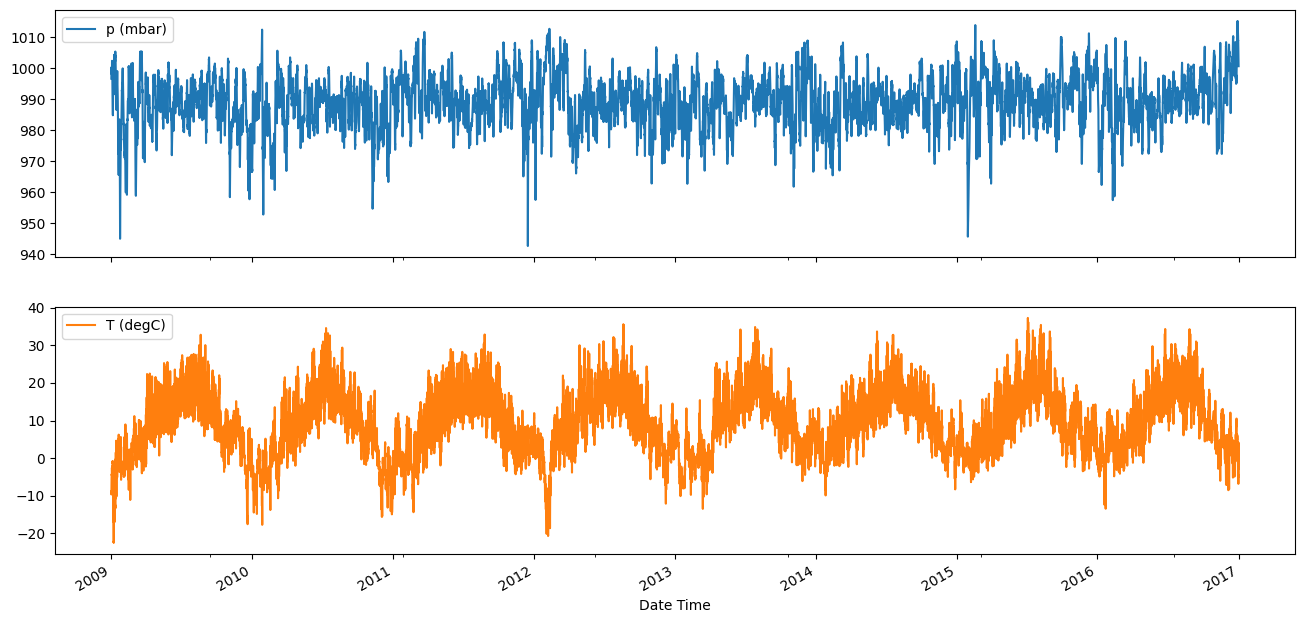

In [52]:
# Let's plot the data
plot_cols = ['p (mbar)', 'T (degC)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [53]:
# Makeing the upper same plots using plotly
fig = px.line(df,x=date_time,y = "T (degC)")
fig.show()
fig = px.line(df,x=date_time,y = "p (mbar)")
fig.update_traces(line_color='red')
fig.show()

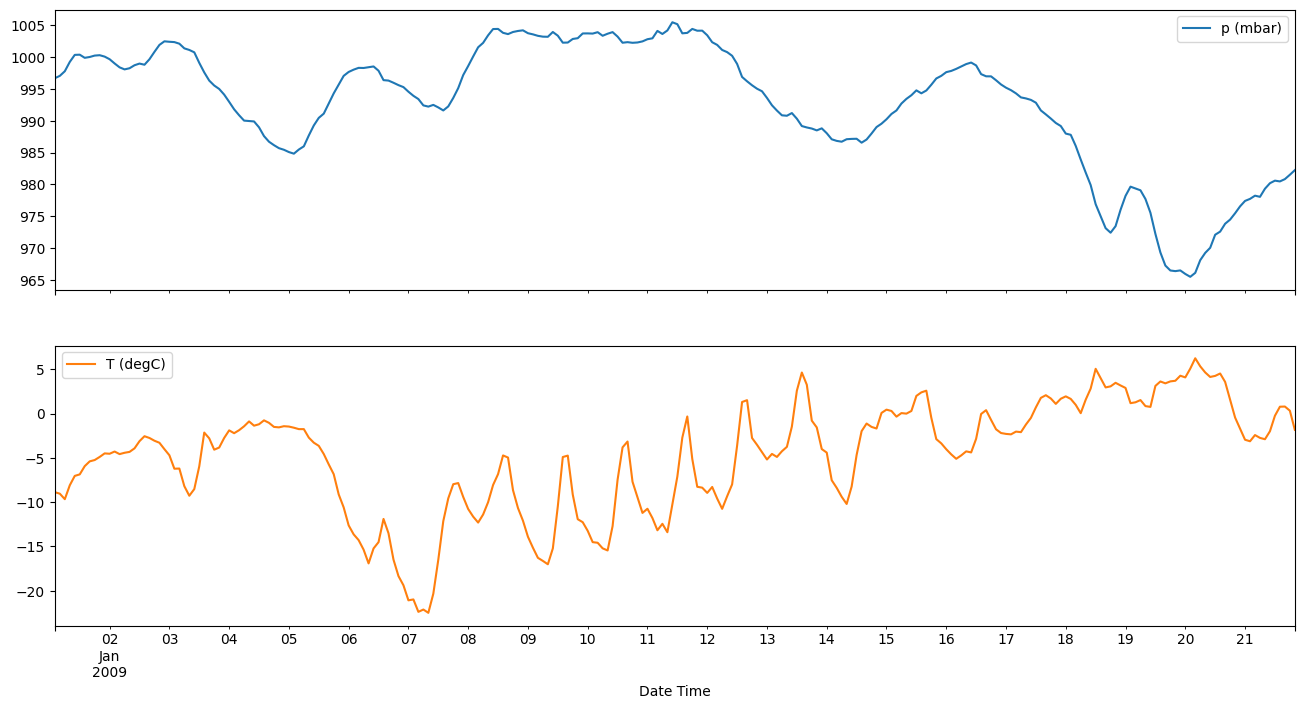

In [54]:
# Let's plot the data for only 500 hours dataset which is equal to 250 rows
plot_cols = ['p (mbar)', 'T (degC)']
plot_features = df[plot_cols][:250]
plot_features.index = date_time[:250]
_ = plot_features.plot(subplots=True)

In [55]:
df.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11    996.62     -8.88    264.54        -9.77    93.2          3.12   
23    996.99     -9.05    264.34       -10.02    92.6          3.07   
35    997.71     -9.67    263.66       -10.62    92.7          2.93   
47    999.17     -8.10    265.12        -9.05    92.8          3.31   
59   1000.27     -7.04    266.10        -8.17    91.6          3.60   

    VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11          2.90          0.21       1.81             2.91       1312.25   
23          2.85          0.23       1.78             2.85       1313.61   
35          2.71          0.21       1.69             2.72       1317.71   
47          3.07          0.24       1.92             3.08       1311.65   
59          3.30          0.30       2.05             3.29       1307.76   

    wv (m/s)  max. wv (m/s)  wd (deg)  
11      0.25           0.63     190.3  
23      0.10           0.38     240.0  
35      0.05           0.50     146.0  
47      0.72           1.25     213.9  
59      1.45           3.00     292.6

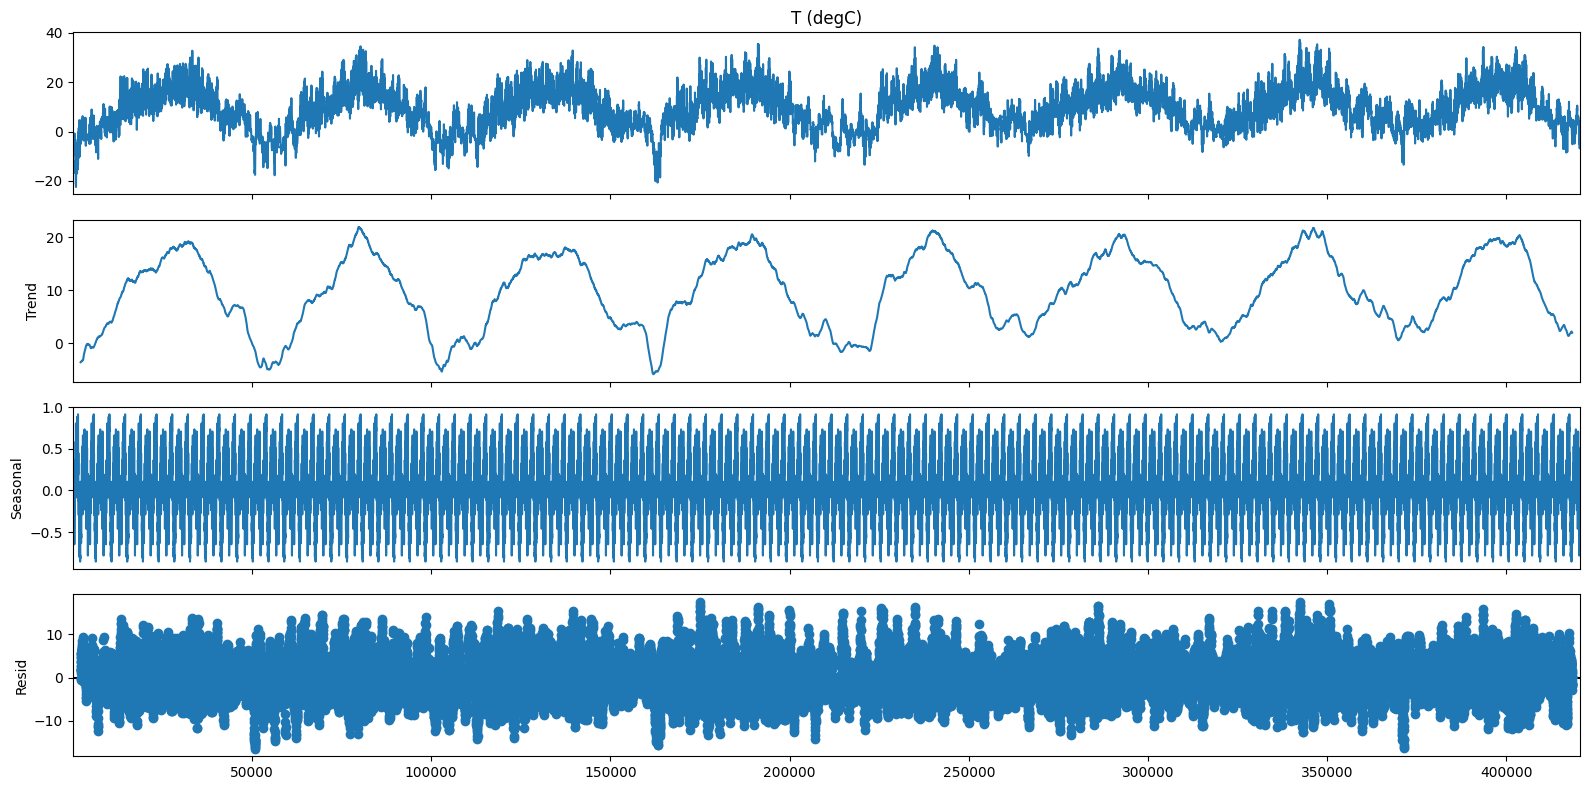

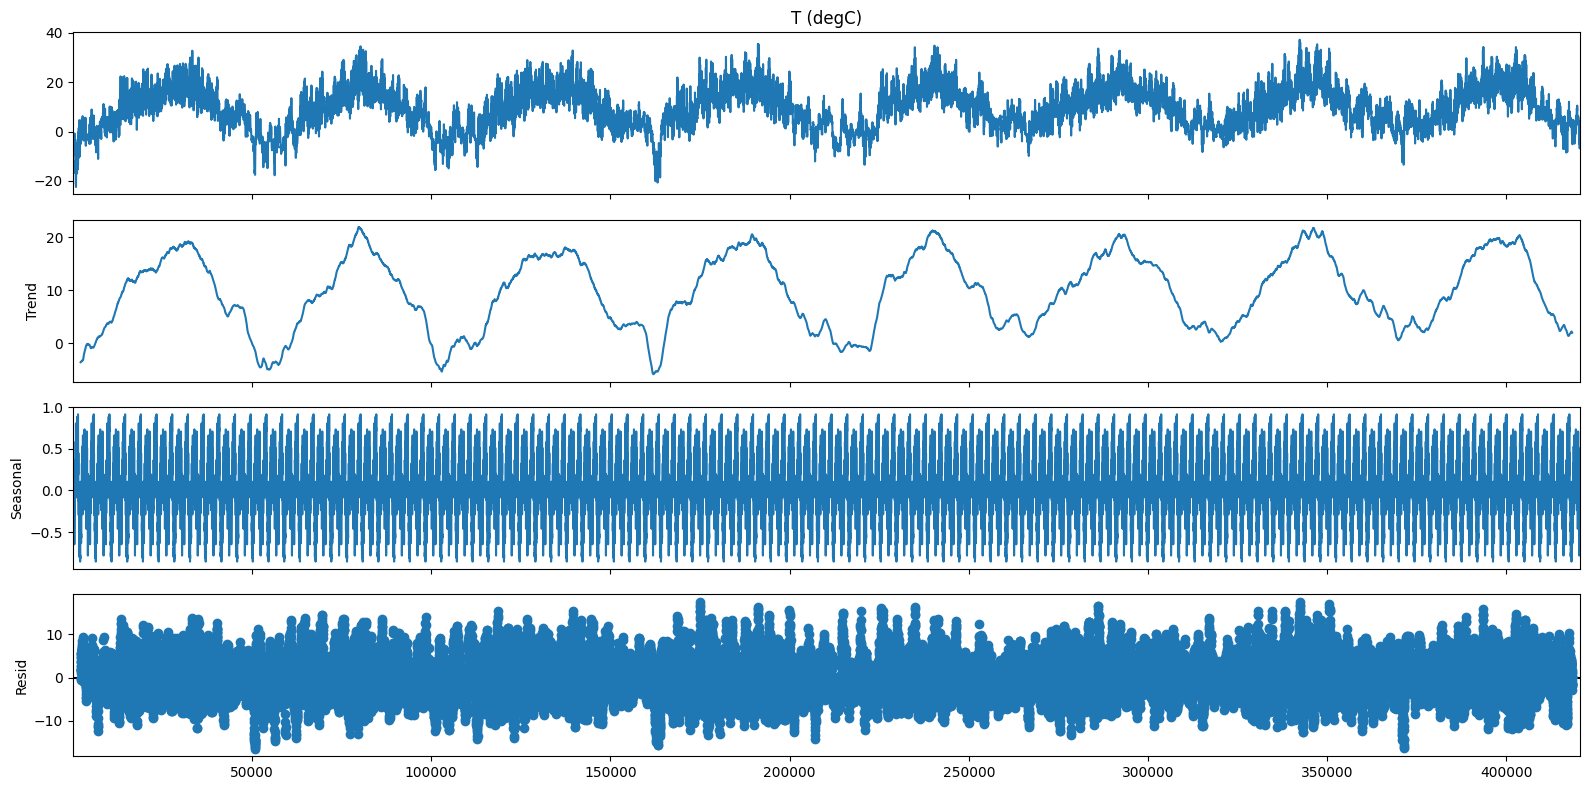

In [56]:
# Decompose the data into trends, seasonality,and residuals
decompose = seasonal_decompose(df["T (degC)"],model="addictive",period=365)
decompose.plot()

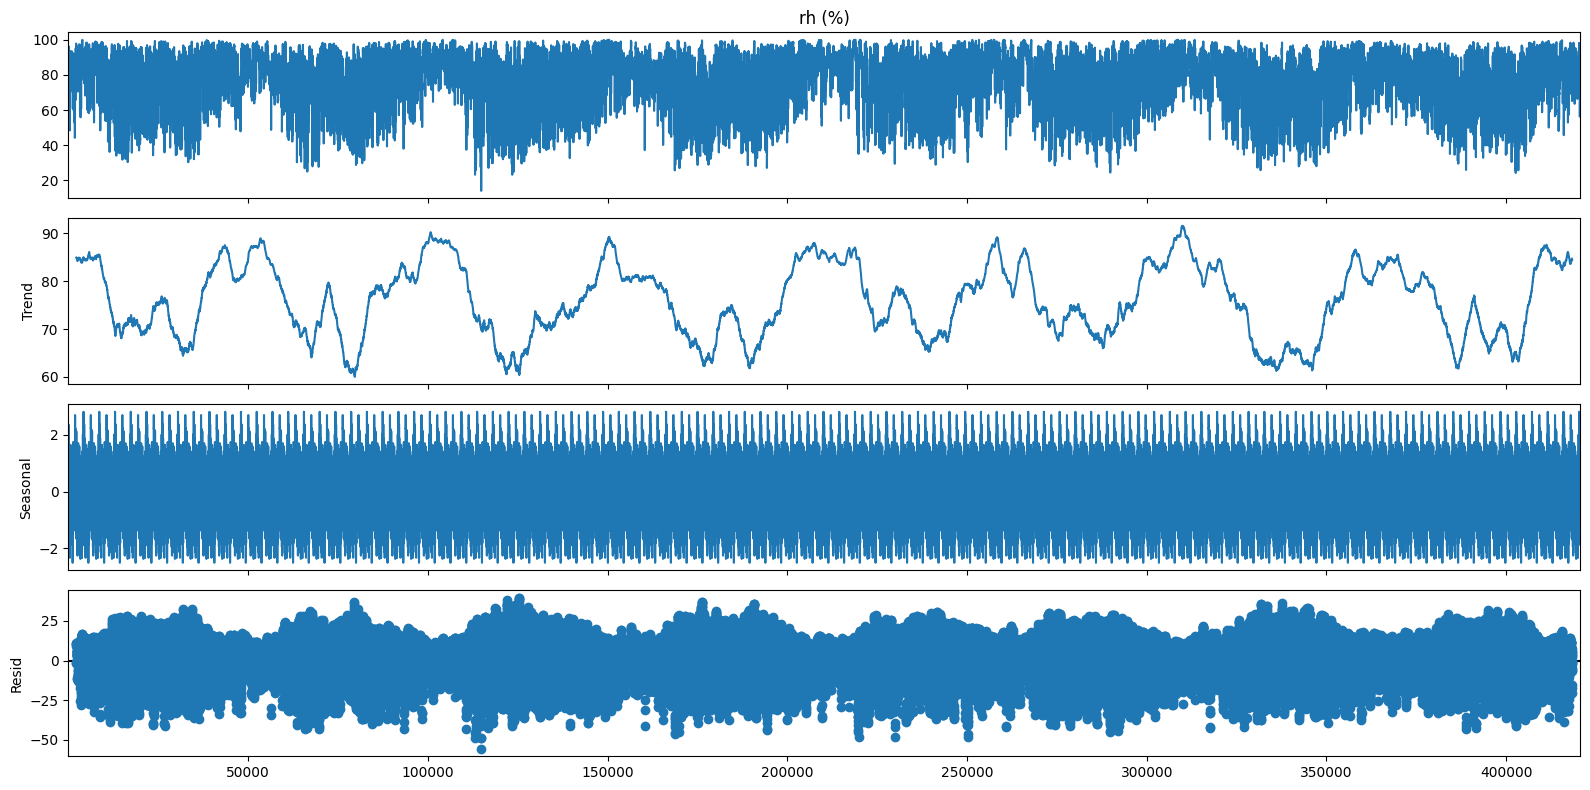

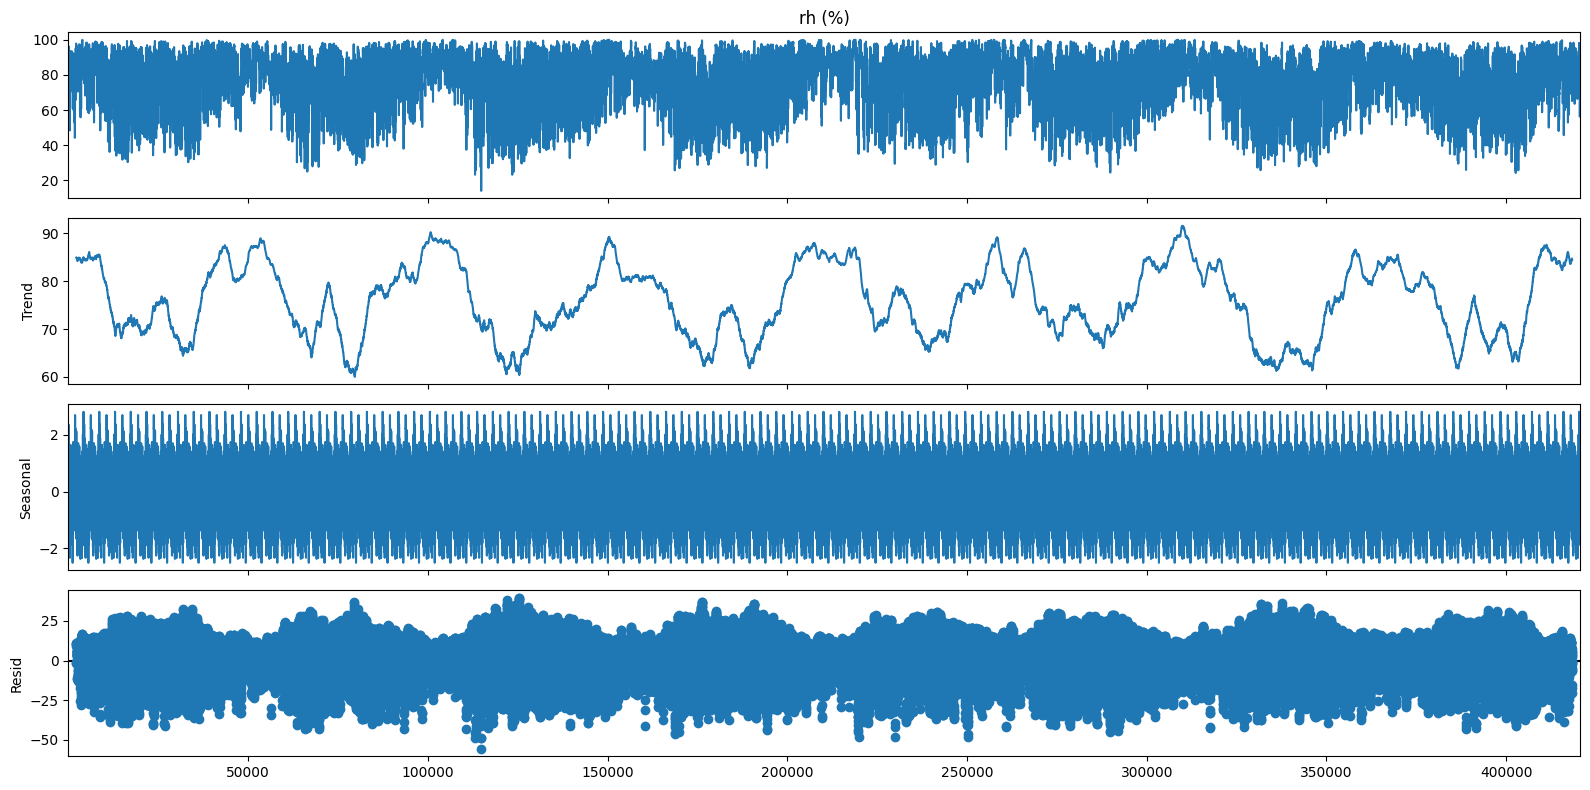

In [60]:
# Decompose the data into trends, seasonality,and residuals
decompose = seasonal_decompose(df["rh (%)"],model="addictive",period=365)
decompose.plot()

In [61]:
# clean up the null values
df.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [62]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     1.558001  75.567534 -9999.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [65]:
wv = df["wv (m/s)"]
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

In [71]:
max_wv = df["max. wv (m/s)"]
max_bad_wv = max_wv == -9999.0
max_wv[max_bad_wv] = 0.0

In [72]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     3.532633   2.343832     0.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [73]:
df.shape

(35045, 14)

In [74]:
# split the data into train, validation and test i have 35045 records make 70% for training, 20% for validation and 10% for testing
# 70% of 35045 is 24531
# 20% of 35045 is 7009
# 10% of 35045 is 3505
# total 35045

# training
train_df = df[:24531]
# validation
val_df = df[24531:31540]
# testing
test_df = df[31540:]

# let check the shape
train_df.shape, val_df.shape, test_df.shape

((24531, 14), (7009, 14), (3505, 14))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

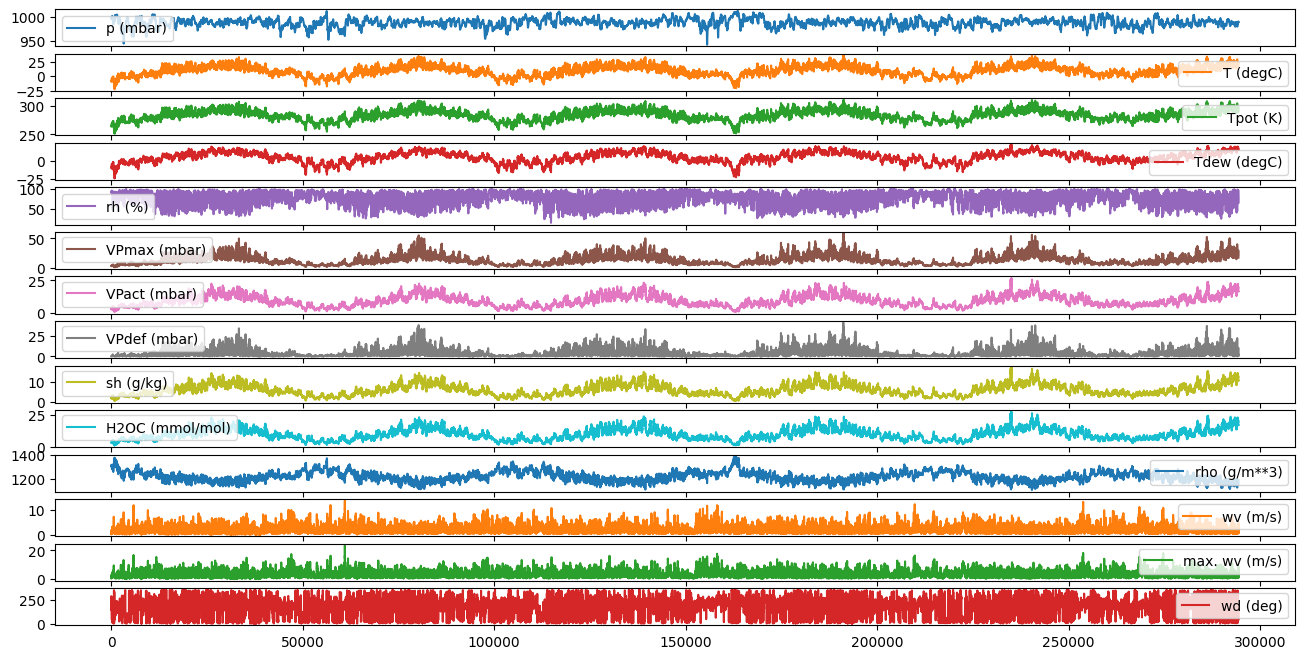

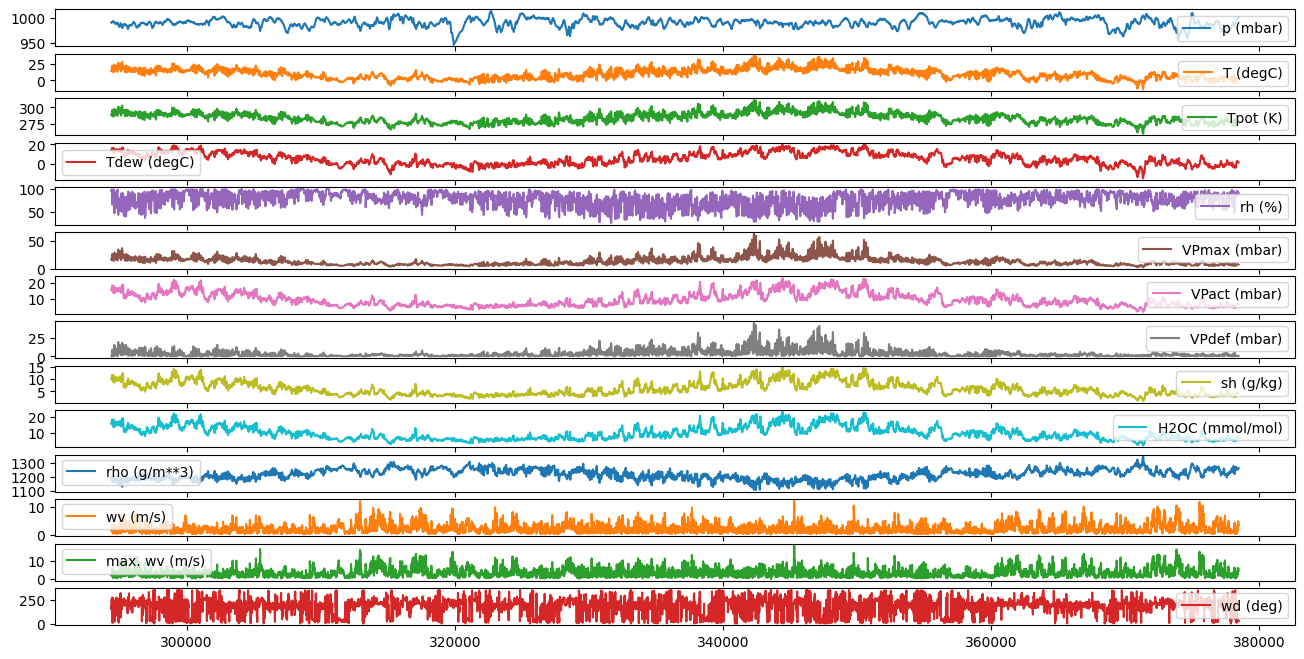

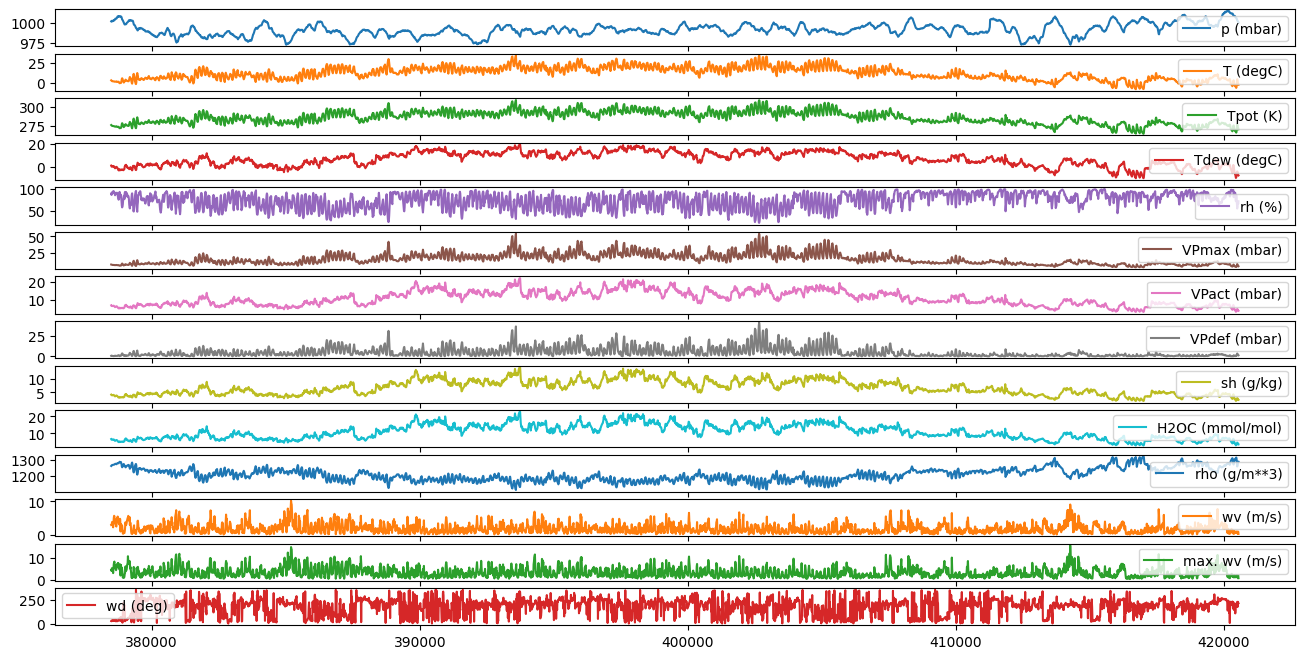

In [75]:
# let plot the data

train_df.plot(subplots=True)
val_df.plot(subplots=True)
test_df.plot(subplots=True)

In [76]:
# let's normalize the data
# we will take mean and standard deviation of the train data to normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

# lets normalize the training data
train_df = (train_df - train_mean) / train_std
# lets normalize the validation data
val_df = (val_df - train_mean) / train_std
# lets normalize the testing data
test_df = (test_df - train_mean) / train_std

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

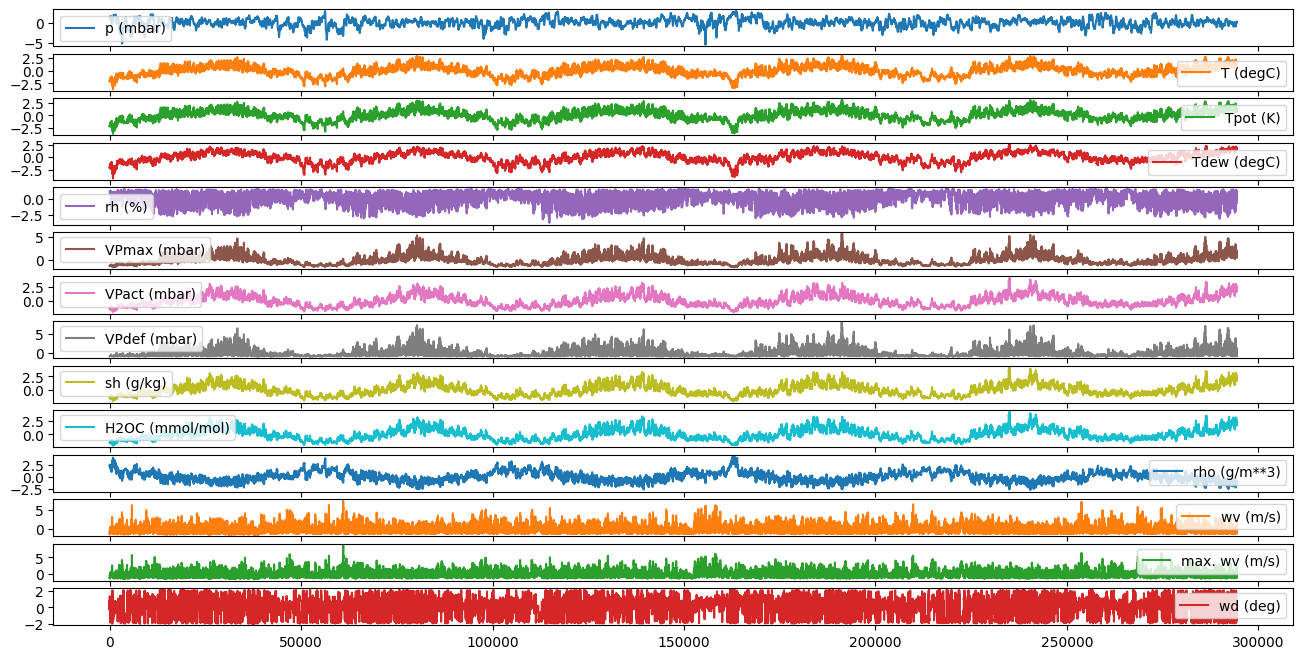

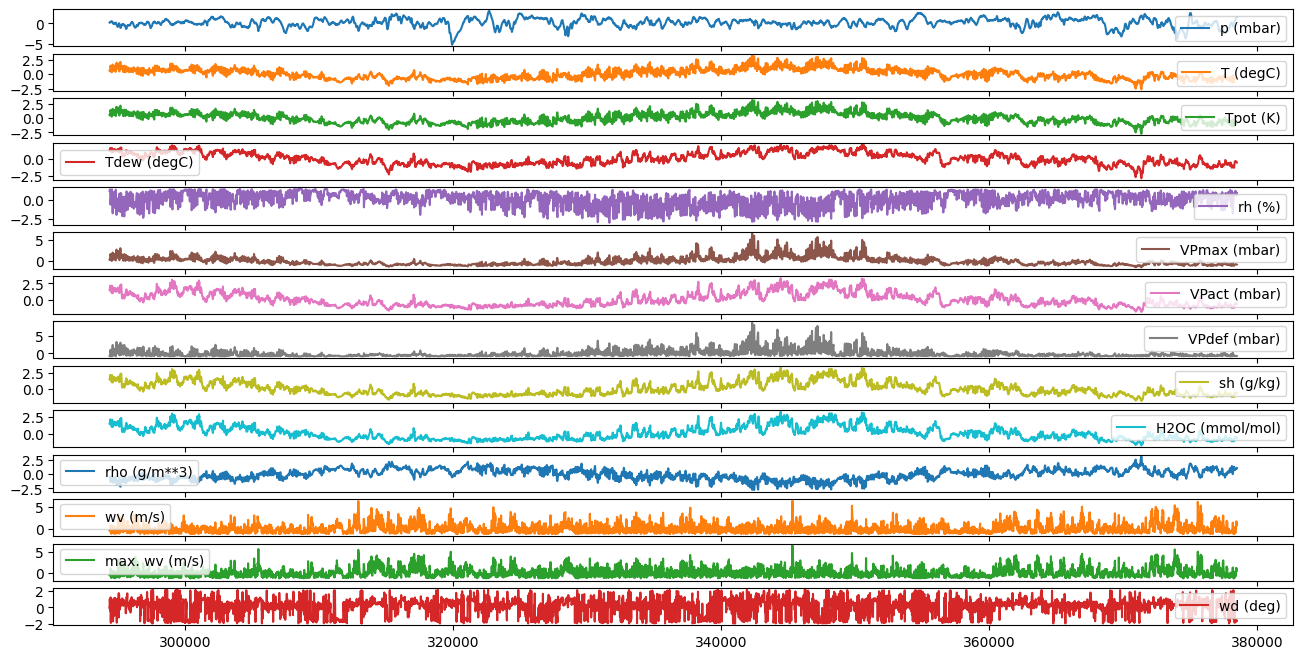

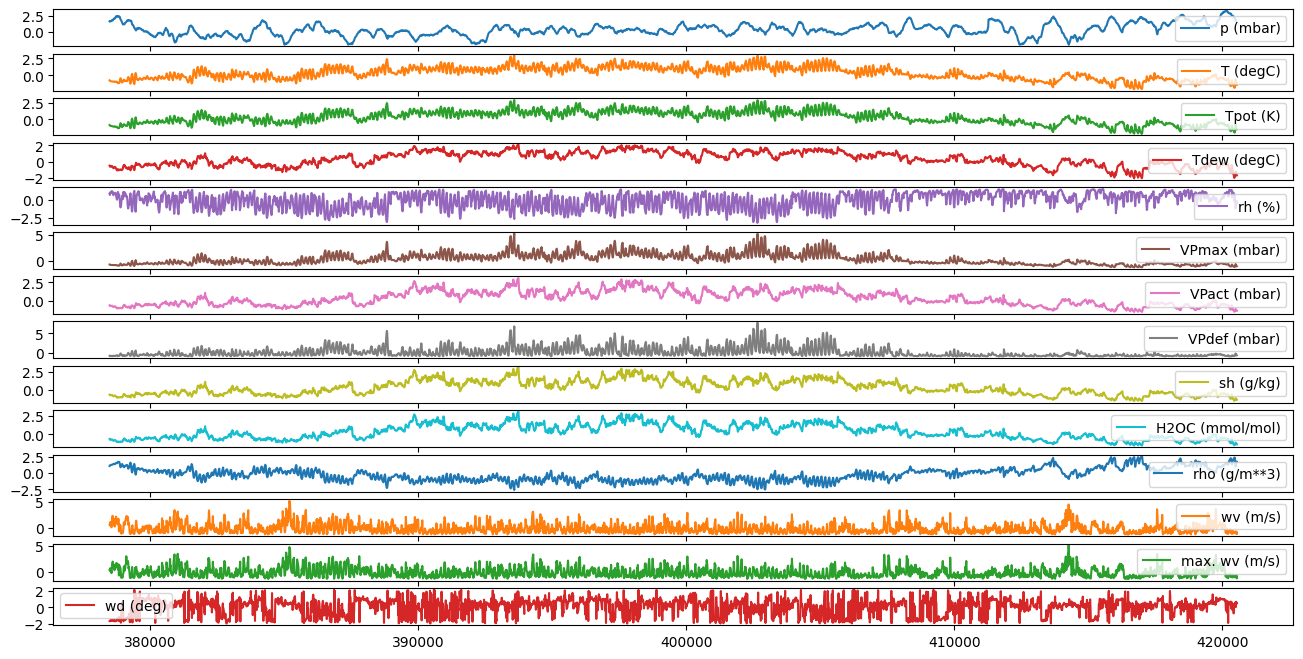

In [77]:
# let plot the data

train_df.plot(subplots=True)
val_df.plot(subplots=True)
test_df.plot(subplots=True)

C:\Users\Sumit Sharma\AppData\Local\Temp\ipykernel_24040\3214313372.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



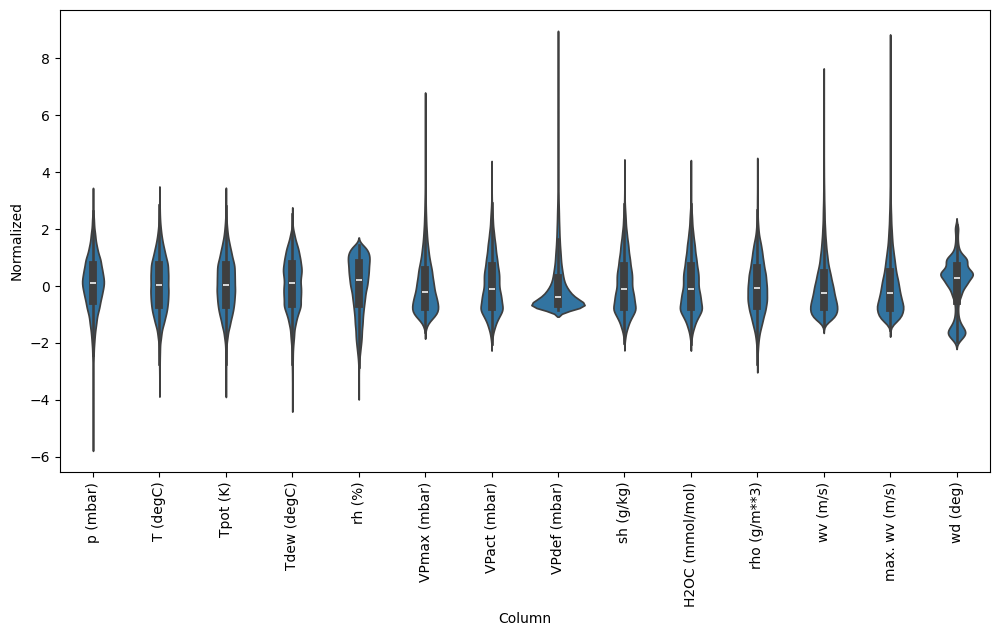

In [78]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)